### Objective

The goal of this data analysis project using SQL would be to identify the opportunities to increase the occupancy rate on low performing flights, which can ultimately lead to increased profitability of airline.

### 1. Importing Libraries

In [1]:
import sqlite3
import json
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### 2. Database Connection

In [2]:
connection = sqlite3.connect("travel.sqlite")
cursor = connection.cursor()

In [3]:
cursor.execute("""SELECT name FROM sqlite_master WHERE type='table';""") #"sqlite_master" table contains metadata about all the objects (including tables) in the database
print("List of all tables present in the database")
table_list = [table[0] for table in cursor.fetchall()]
table_list

List of all tables present in the database


['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

### 3. Data Exploration

In [4]:
print("Shapes of all tables:")
print("---------------------")
for table_name in table_list:
    df = pd.read_sql_query(f"SELECT * FROM {table_name};",connection)
    print(f"{table_name} -> {df.shape}")

Shapes of all tables:
---------------------
aircrafts_data -> (9, 3)
airports_data -> (104, 5)
boarding_passes -> (579686, 4)
bookings -> (262788, 3)
flights -> (33121, 10)
seats -> (1339, 3)
ticket_flights -> (1045726, 4)
tickets -> (366733, 3)


In [5]:
print("Checking all tables:")
i=0
for table_name in table_list:
    i+=1
    df = pd.read_sql_query(f"SELECT * FROM {table_name};",connection)
    print("---------------------------")
    print(f"{i}. {table_name}")
    print("---------------------------")
    print(f"{df.head(5)}")

Checking all tables:
---------------------------
1. aircrafts_data
---------------------------
  aircraft_code                                              model  range
0           773    {"en": "Boeing 777-300", "ru": "Боинг 777-300"}  11100
1           763    {"en": "Boeing 767-300", "ru": "Боинг 767-300"}   7900
2           SU9  {"en": "Sukhoi Superjet-100", "ru": "Сухой Суп...   3000
3           320  {"en": "Airbus A320-200", "ru": "Аэробус A320-...   5700
4           321  {"en": "Airbus A321-200", "ru": "Аэробус A321-...   5600
---------------------------
2. airports_data
---------------------------
  airport_code                                       airport_name  \
0          YKS          {"en": "Yakutsk Airport", "ru": "Якутск"}   
1          MJZ            {"en": "Mirny Airport", "ru": "Мирный"}   
2          KHV  {"en": "Khabarovsk-Novy Airport", "ru": "Хабар...   
3          PKC        {"en": "Yelizovo Airport", "ru": "Елизово"}   
4          UUS  {"en": "Yuzhno-Sakhalinsk A

In [6]:
print("Types of Columns of all tables:")
i=0
for table_name in table_list:
    print("---------------------")
    i+=1
    cursor.execute(f"PRAGMA table_info({table_name})")
    column_info = cursor.fetchall()
    print(f"{i}: {table_name}")
    for column in column_info:
        print(column[1:3])

Types of Columns of all tables:
---------------------
1: aircrafts_data
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')
---------------------
2: airports_data
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')
---------------------
3: boarding_passes
('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')
---------------------
4: bookings
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')
---------------------
5: flights
('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_a

In [7]:
print("Checking null values:") #No null values = Data is already clean
i=0
for table_name in table_list:
    i+=1
    df = pd.read_sql_query(f"SELECT * FROM {table_name};",connection)
    print("---------------------------")
    print(f"{i}. {table_name}")
    print("---------------------------")
    print(f"{df.isnull().sum()}")

Checking null values:
---------------------------
1. aircrafts_data
---------------------------
aircraft_code    0
model            0
range            0
dtype: int64
---------------------------
2. airports_data
---------------------------
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64
---------------------------
3. boarding_passes
---------------------------
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64
---------------------------
4. bookings
---------------------------
book_ref        0
book_date       0
total_amount    0
dtype: int64
---------------------------
5. flights
---------------------------
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64
---------------------------
6. seats


### 4. Basic Analysis

#### Q1. How many planes have more than 100 seats?

In [8]:
cursor.execute("""
    SELECT model, COUNT(*)
    FROM seats
    INNER JOIN aircrafts_data ON aircrafts_data.aircraft_code = seats.aircraft_code
    GROUP BY seats.aircraft_code
    HAVING COUNT(*) > 100
    ORDER BY COUNT(*)
""")

print("List of all aircrafts having more than 100 seats:")

table_data = []
i = 1
for data in cursor.fetchall():
    name = json.loads(data[0])["en"]
    table_data.append([i, name, data[1]])
    i += 1

headers = ["S. No.", "Aircraft Model", "Total Seats"]
table = tabulate(table_data, headers, tablefmt="fancy_grid")
print(table)

List of all aircrafts having more than 100 seats:
╒══════════╤══════════════════╤═══════════════╕
│   S. No. │ Aircraft Model   │   Total Seats │
╞══════════╪══════════════════╪═══════════════╡
│        1 │ Airbus A319-100  │           116 │
├──────────┼──────────────────┼───────────────┤
│        2 │ Boeing 737-300   │           130 │
├──────────┼──────────────────┼───────────────┤
│        3 │ Airbus A320-200  │           140 │
├──────────┼──────────────────┼───────────────┤
│        4 │ Airbus A321-200  │           170 │
├──────────┼──────────────────┼───────────────┤
│        5 │ Boeing 767-300   │           222 │
├──────────┼──────────────────┼───────────────┤
│        6 │ Boeing 777-300   │           402 │
╘══════════╧══════════════════╧═══════════════╛


#### Q2. How the number of tickets booked & total amount earned changed with the time?

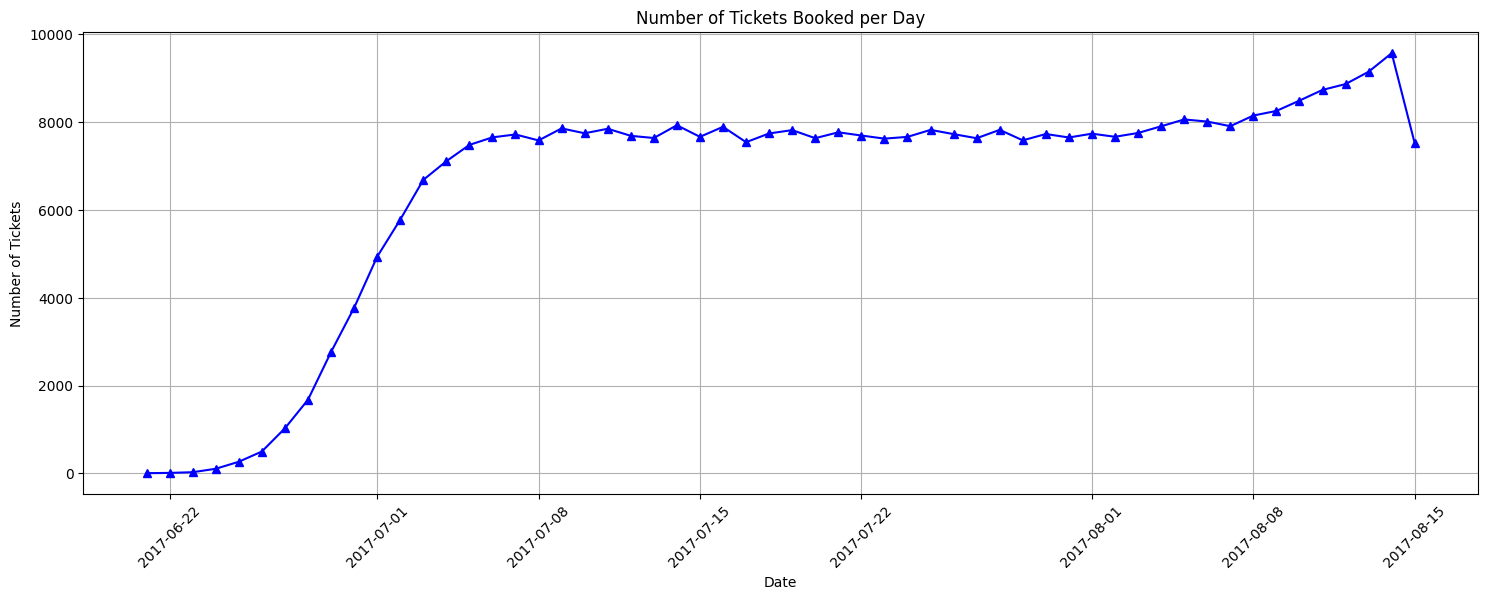

In [10]:
tickets = pd.read_sql_query("""select * from tickets inner join bookings on tickets.book_ref = bookings.book_ref;""",connection)
tickets["book_date"] = pd.to_datetime(tickets["book_date"])
tickets["date"] = tickets["book_date"].dt.date
data = tickets.groupby("date")[["date"]].count()

plt.figure(figsize=(18, 6))
plt.plot(data.index, data["date"], marker="^", linestyle="-", color="blue")
plt.title("Number of Tickets Booked per Day")
plt.xlabel("Date")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

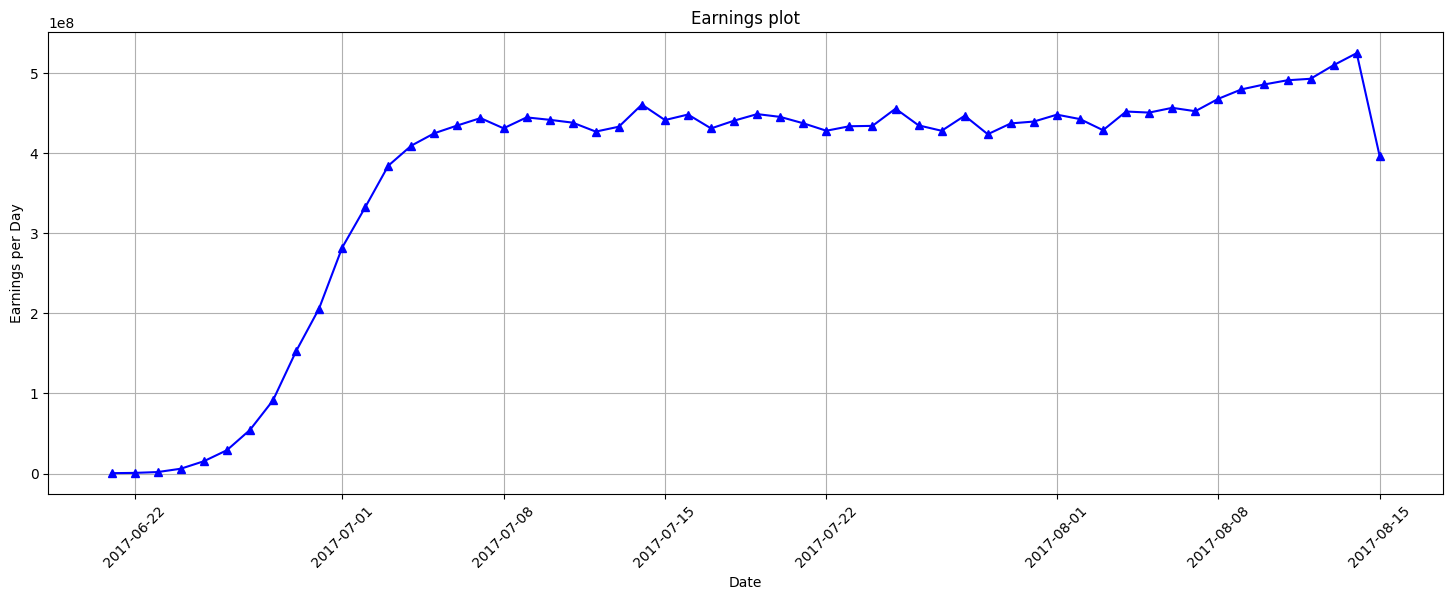

In [11]:
bookings = pd.read_sql_query("""select * from bookings;""",connection)
bookings["date"] = pd.to_datetime(bookings["book_date"]).dt.date
data = bookings.groupby("date")[["total_amount"]].sum()

plt.figure(figsize=(18, 6))
plt.plot(data.index, data["total_amount"], marker="^", linestyle="-", color="blue")
plt.title("Earnings plot")
plt.xlabel("Date")
plt.ylabel("Earnings per Day")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### Q3. Calculate the average charges for each aircraft with different fair conditions.

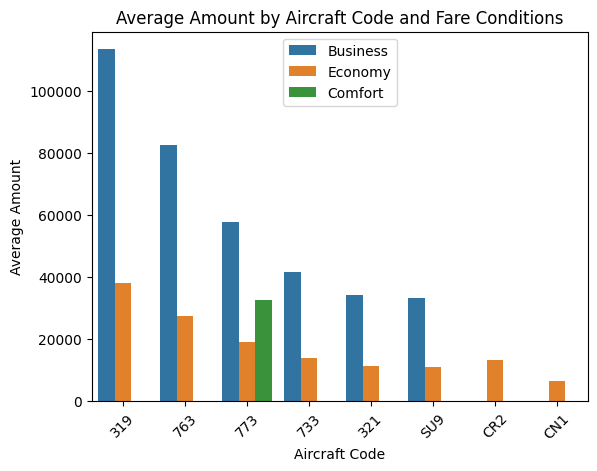

In [22]:
df = pd.read_sql_query("""select aircraft_code,fare_conditions, avg(amount) from ticket_flights inner join flights on ticket_flights.flight_id = flights.flight_id group by aircraft_code,fare_conditions order by avg(amount) desc;""",connection)

sns.barplot(data=df, x="aircraft_code", y="avg(amount)", hue="fare_conditions")

# Set plot aesthetics
plt.xlabel("Aircraft Code")
plt.ylabel("Average Amount")
plt.title("Average Amount by Aircraft Code and Fare Conditions")
plt.legend(loc="best")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

### 4. Analyzing Occupancy Rate

#### Q1. For each aircraft, calculate the total revenue per year and average revenue per ticket

In [30]:
pd.read_sql_query("""select aircraft_code, total_revenue, ticket_count, total_revenue/ticket_count as avg_revenue_per_ticket from 
(select aircraft_code, count(*) as ticket_count, sum(amount) as total_revenue from ticket_flights
                    join flights on ticket_flights.flight_id = flights.flight_id group by aircraft_code)""",connection)

,aircraft_code,total_revenue,ticket_count,avg_revenue_per_ticket
0,319,2706163100,52853,51201
1,321,1638164100,107129,15291
2,733,1426552100,86102,16568
3,763,4371277100,124774,35033
4,773,3431205500,144376,23765
5,CN1,96373800,14672,6568
6,CR2,1982760500,150122,13207
7,SU9,5114484700,365698,13985


#### Q2. Calculate the average occupancy per aircraft.

In [41]:
occupancy_rate = pd.read_sql_query("""select a.aircraft_code, avg(a.seats_count) as booked_seats,b.num_seats, avg(a.seats_count)/num_seats as occupancy_rate
from 
(select aircraft_code, flights.flight_id, count(*) as seats_count from boarding_passes inner join flights on boarding_passes.flight_id = flights.flight_id group by aircraft_code, flights.flight_id) as a 
inner join
(select aircraft_code, count(*) as num_seats from seats group by aircraft_code) as b 
on 
a.aircraft_code = b.aircraft_code 
group by a.aircraft_code;""",connection)

occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate
0,319,53.583181,116,0.461924
1,321,88.809231,170,0.522407
2,733,80.255462,130,0.617350
3,763,113.937294,222,0.513231
4,773,264.925806,402,0.659019
5,CN1,6.004431,12,0.500369
6,CR2,21.482847,50,0.429657
7,SU9,56.812113,97,0.585692


#### Q3. Calculate by how much the total annual turnover could increase by giving all aircraft a 10% higher occupancy rate.

In [42]:
occupancy_rate["Inc occupancy rate"] = occupancy_rate["occupancy_rate"]*1.1

In [43]:
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,Inc occupancy rate
0,319,53.583181,116,0.461924,0.508116
1,321,88.809231,170,0.522407,0.574648
2,733,80.255462,130,0.617350,0.679085
3,763,113.937294,222,0.513231,0.564554
4,773,264.925806,402,0.659019,0.724921
5,CN1,6.004431,12,0.500369,0.550406
6,CR2,21.482847,50,0.429657,0.472623
7,SU9,56.812113,97,0.585692,0.644261


In [44]:
total_revenue = pd.read_sql_query("""select aircraft_code, sum(amount) as total_revenue from ticket_flights
join flights on ticket_flights.flight_id = flights.flight_id group by aircraft_code;""",connection)

In [45]:
occupancy_rate["Inc Total Annual Turnover"] = (total_revenue["total_revenue"]/occupancy_rate["occupancy_rate"])*occupancy_rate["Inc occupancy rate"]

In [47]:
pd.set_option("display.float_format",str)
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,Inc occupancy rate,Inc Total Annual Turnover
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,2976779410.0
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,1801980510.0
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,1569207310.0000002
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,4808404810.0
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372493,3774326050.0000005
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,106011180.00000001
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484383,2181036550.0
7,SU9,56.81211267605634,97,0.5856918832583128,0.6442610715841441,5625933170.000001
